In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

datapath = "/content/gdrive/My Drive/Datasets/MNIST/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import random as r

# Helper Functions

In [3]:
def breaker():
  print("\n" + 30*"-" + "\n")

def head(x, no_of_ele=5):
  breaker()
  print(x[:no_of_ele])
  breaker()

def getData():
  tr = pd.read_csv(datapath + "train.csv")
  ts = pd.read_csv(datapath + "test.csv")

  breaker()
  print("TRAINING SET")
  breaker()
  print(tr.head())
  print("\nTraining Set Shape :", repr(tr.shape))
  breaker()
  print("TEST SET")
  breaker()
  print(tr.head())
  print("\nTest Set Shape     :", repr(ts.shape))
  breaker()

  return tr, ts

def imagePlotter(x=None, idx=None):
  im = x.copy().values
  im = im.reshape(28, 28)
  title = "Sample Number {idx}".format(idx=idx)
  fig = px.imshow(im, title=title)
  fig.update_layout(autosize=False, width=400, height=400, margin=dict(l=100, r=100, b=100, t=100, pad=2), paper_bgcolor = "rgba(150,200,150,200)")
  fig.show()

def matplotlibImagePlotter(x=None, idx=None):
  im = x.copy().values
  im = im.reshape(28, 28)
  title = "Sample Number {idx}".format(idx=idx)
  plt.figure(figsize=(6, 6))
  plt.imshow(im)
  plt.title(title)
  plt.show()

# Data Handling

In [4]:
tr_Set, ts_Set = getData()

X, y = tr_Set.iloc[:, 1:].copy(), tr_Set.iloc[:, 0].copy()

X_test, y_test = ts_Set.iloc[:, 1:].copy(), ts_Set.iloc[:, 0].copy()

del tr_Set, ts_Set

num_features = X.shape[1]
num_obs_test = X_test.shape[0]


------------------------------

TRAINING SET

------------------------------

   label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      0      0      0      0
3      1    0    0    0    0    0  ...      0      0      0      0      0      0
4      9    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]

Training Set Shape : (60000, 785)

------------------------------

TEST SET

------------------------------

   label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      

# Plots (Plotly Express)

In [5]:
fig = px.histogram(
    y, 
    x="label",
    width=800,
    height=500,
    nbins=20,
    title="Classes Distribution (Train Set)"
)

fig.show()

In [6]:
fig = px.histogram(
    y_test, 
    x="label",
    width=800,
    height=500,
    nbins=20,
    title="Classes Distribution (Test Set)"
)

fig.show()

In [7]:
tr_idx = r.randint(0, 60000)
ts_idx = r.randint(0, 10000)

imagePlotter(X.iloc[tr_idx, :], tr_idx)

In [8]:
imagePlotter(X_test.iloc[ts_idx, :], ts_idx)

# Plots (Matlotlib)

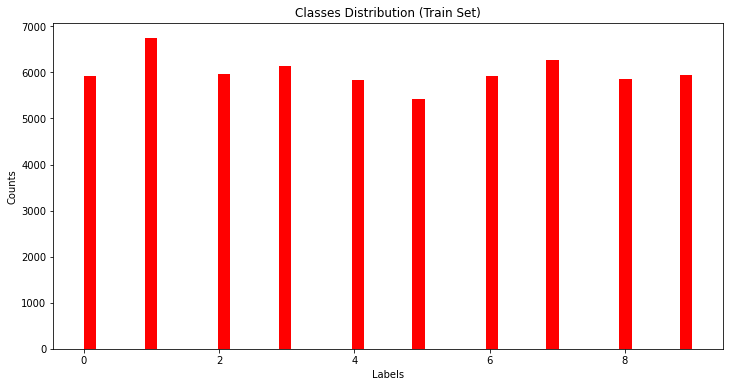

In [9]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(y, bins=50, color="red")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Classes Distribution (Train Set)")
plt.show()

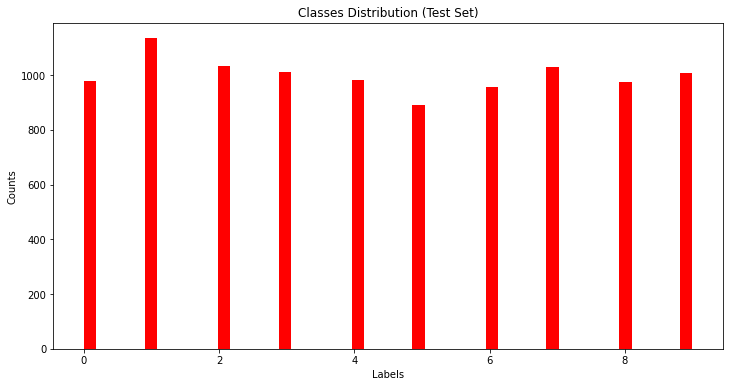

In [10]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(y_test, bins=50, color="red")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Classes Distribution (Test Set)")
plt.show()

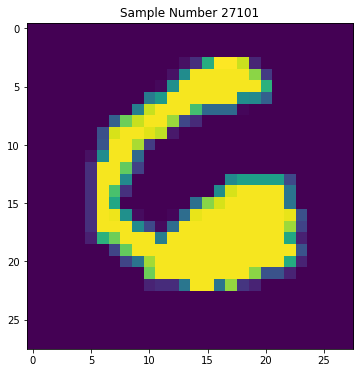

In [11]:
matplotlibImagePlotter(X.iloc[tr_idx, :], tr_idx)

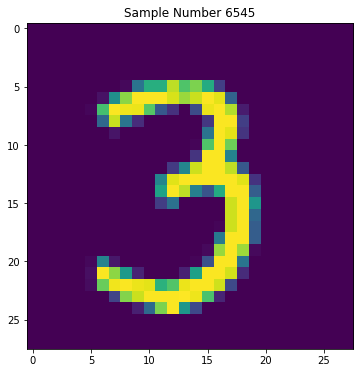

In [12]:
matplotlibImagePlotter(X.iloc[ts_idx, :], ts_idx)